## Задача 1

### Постройте график. Назовите график. Сделайте именование оси x и оси y. Сделайте выводы.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [176]:
df = pd.read_csv('kc_house_data.csv')

In [162]:
price_bedroom = df.groupby('bedrooms').agg({'price' : 'mean'}).round(2).reset_index().sort_values(by='bedrooms')

In [163]:
price_bedroom

,bedrooms,price
0,0,409503.85
1,1,317642.88
2,2,401372.68
3,3,466232.08
4,4,635419.50
5,5,786599.83
6,6,825520.64
7,7,951184.66
8,8,1105076.92
9,9,893999.83


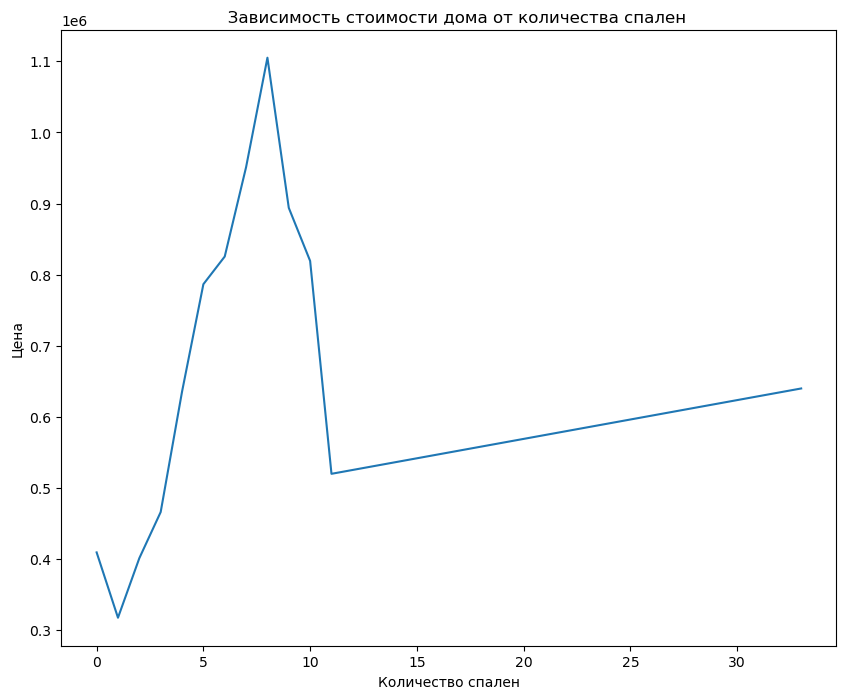

In [164]:
plt.figure(figsize=(10, 8))
plt.plot(price_bedroom['bedrooms'], price_bedroom['price'])

plt.title('   Зависимость стоимости дома от количества спален')
plt.xlabel('Количество спален')
plt.ylabel('Цена');

На графике мы видим сначала относительно линейный рост средней стоимости дома в зависимости от количества спален с пиком на 8. Далее идет явное снижение на промежутке от 8 до 11 и выброс со значением 33. График не дает ответа на вопрос почему так происходит, нужно смотреть другие данные. Мы по этому графику можем лишь констатировать данные.

### Изучите распределение квадратуры жилой

In [29]:
price_sqft = df.groupby('sqft_living').agg({'price' : 'median'}).round(2).reset_index().sort_values(by='sqft_living')

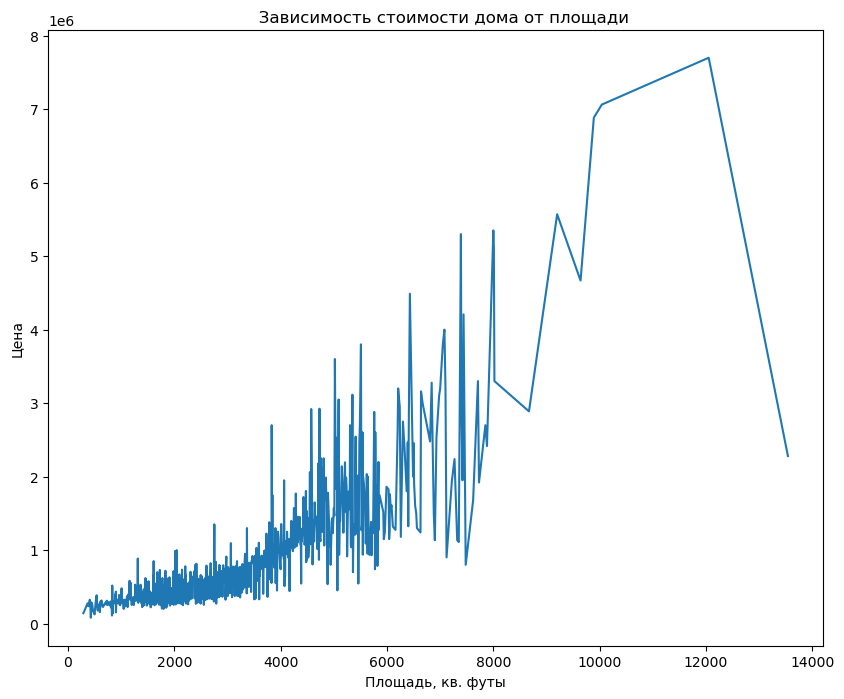

In [143]:
plt.figure(figsize=(10, 8))
plt.plot(price_sqft['sqft_living'], price_sqft['price'])

plt.title('   Зависимость стоимости дома от площади')
plt.xlabel('Площадь, кв. футы')
plt.ylabel('Цена');

В начале графика мы видим почти линейную зависимость медианной стоимости дома от площади. Чем дальше от начала графика, тем большую амплитуду приобретает функция. Можно предположить, что на цену начинают влиять какие-то другие факторы, кроме площади. В конце графика мы видим очевидный выброс.

### Изучите распределение года постройки

In [34]:
year_dist = df.groupby('yr_built')['id'].count().reset_index()

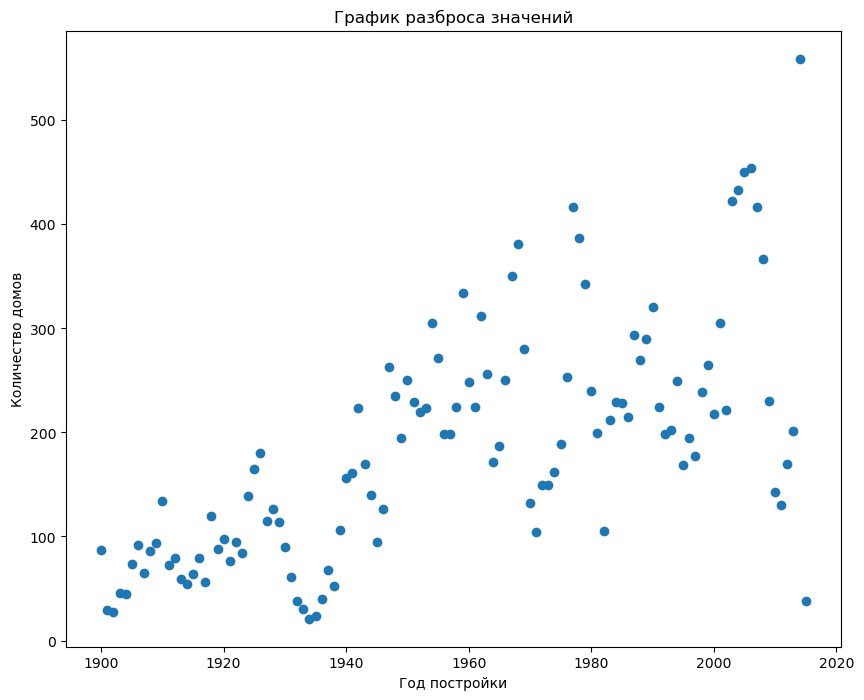

In [144]:
plt.figure(figsize=(10, 8))
plt.scatter(year_dist['yr_built'], year_dist['id'])

plt.title('График разброса значений')
plt.xlabel('Год постройки')
plt.ylabel('Количество домов');

Распределение весьма интересное. В среднем можем говорить, что домов с каждым годом становится все больше. Это может быть связано с разрушением совсем старых домов. Но тем не менее видим несколько явных "ям", которые можно связать с состоянием рынка недвижимости. Резкое сокращение домов начала 30-х годов постройки можно связать с экономическим кризисом. Постоянное увеличение количества домов на промежутке 50-60-х годов говорит наоборот о бурном послевоенном росте экономики. Также видим падение в 80-х годах, рост в 90-х и кризис на ранке ипотечного кредитования 2007-2008 годов. Все глобальные тренды мировой экономики на графике отражены.

## Задача 2

### Изучите распределение домов от наличия вида на набережную

In [88]:
waterfront = df['waterfront'].value_counts()
waterfront.index = ['no', 'yes']

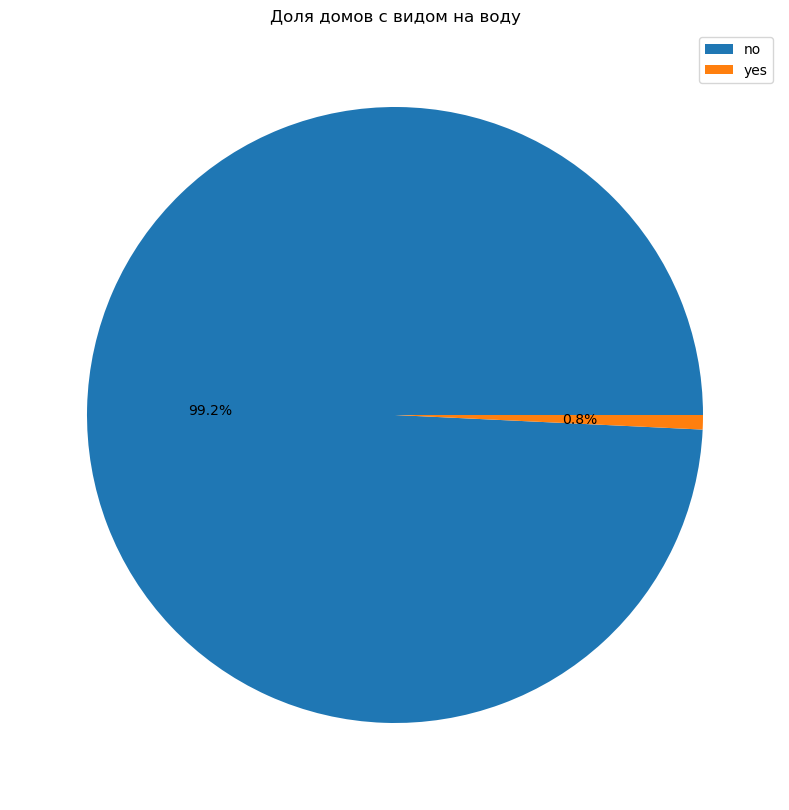

In [101]:
plt.figure(figsize=(15,10))

plt.pie(waterfront, autopct='%1.1f%%')

plt.title('Доля домов с видом на воду')
plt.legend(waterfront.index);

Доля домов с видом на воду не превышает 0.8%

### Изучите распределение этажей домов

In [93]:
number_of_floors = df['floors'].value_counts()

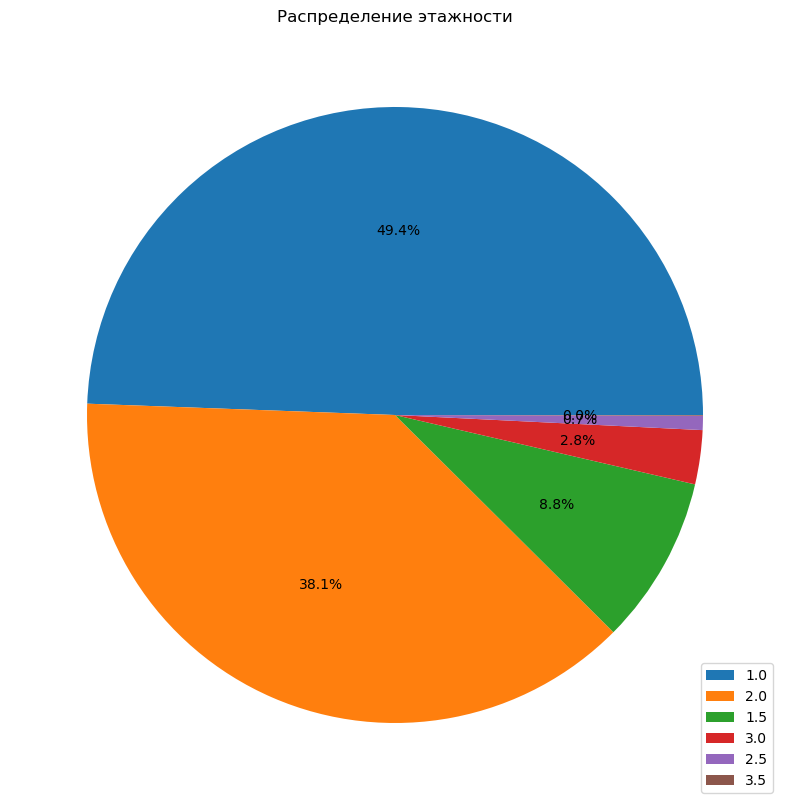

In [100]:
plt.figure(figsize=(15,10))

plt.pie(number_of_floors, autopct='%1.1f%%')

plt.title('Распределение этажности')
plt.legend(number_of_floors.index);

Почти половина домов - одноэтажные. 38% - двухэтажные. Домов выше двух этажей крайне мало. В общем, Америка продолжает быть одноэтажной по большей части.

### Изучите распределение состояния домов

In [102]:
condition = df['condition'].value_counts()

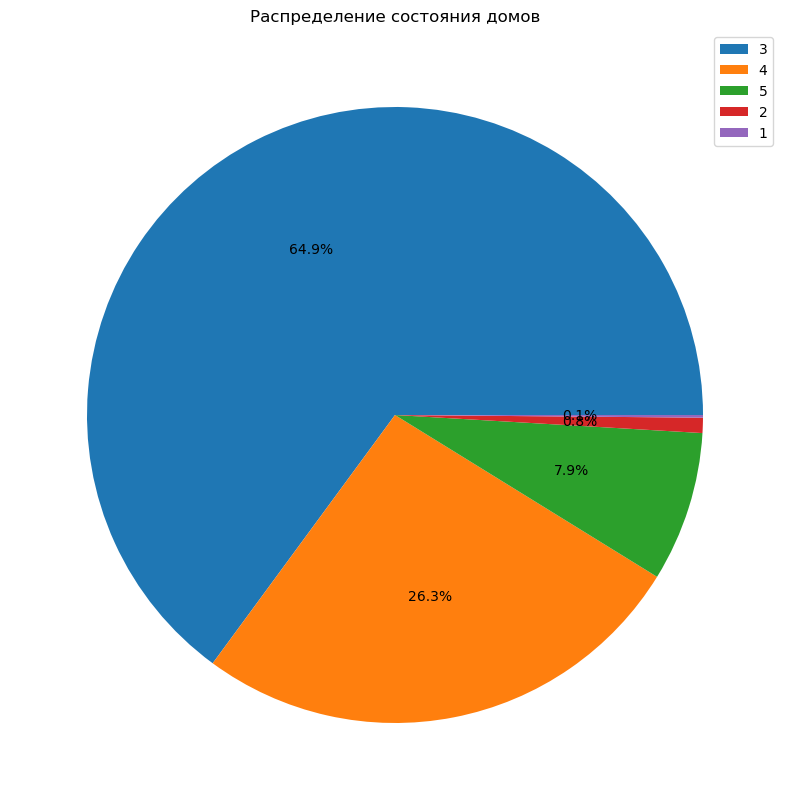

In [104]:
plt.figure(figsize=(15,10))

plt.pie(condition, autopct='%1.1f%%')

plt.title('Распределение состояния домов')
plt.legend(condition.index);

Почти 2/3 домов продаются в стостоянии 3 балла. Вместе с тем, доля домов, оцененных ниже чем в 3 балла, менее 1%. Домов с оценкой 5 баллов лишь 7.9%.

## Задача 3

## Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.

Самый очевидные зависимости (от количества спален и площади) я рассмотрел ранее, сейчас проверю менее очевидные гипотезы.

In [110]:
zip_price = df.groupby('zipcode')['price'].median().reset_index()

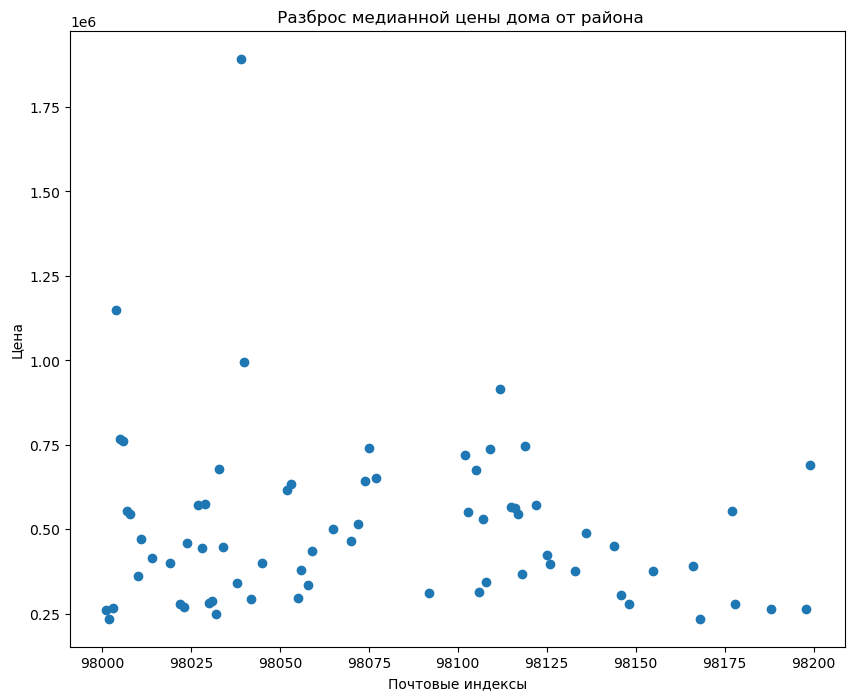

In [122]:
plt.figure(figsize=(10, 8))
plt.scatter(zip_price['zipcode'], zip_price['price'])

plt.title(' Разброс медианной цены дома от района')
plt.xlabel('Почтовые индексы')
plt.ylabel('Цена');

Для начала я решил проверить гипотезу, что медианная цена дома зависит от района. В качестве идентификатора района использовал почтовый индекс. Гипотеза явно подтверждается, разброс на графике виден очень большой: медианная цена колеблется от 250000 до более чем 1750000.

In [136]:
df['delta_renovated'] = df['yr_renovated']- df['yr_built']
df['delta_renovated'] = df['delta_renovated'].apply(lambda x: x if x > 0 else 0)
df.groupby('delta_renovated').agg({'price' : 'median'}).sort_values('price')

,price
delta_renovated,
18,263700.0
83,275000.0
109,285000.0
9,325000.0
62,330000.0
...,...
95,1197750.0
11,1340000.0
14,1515750.0


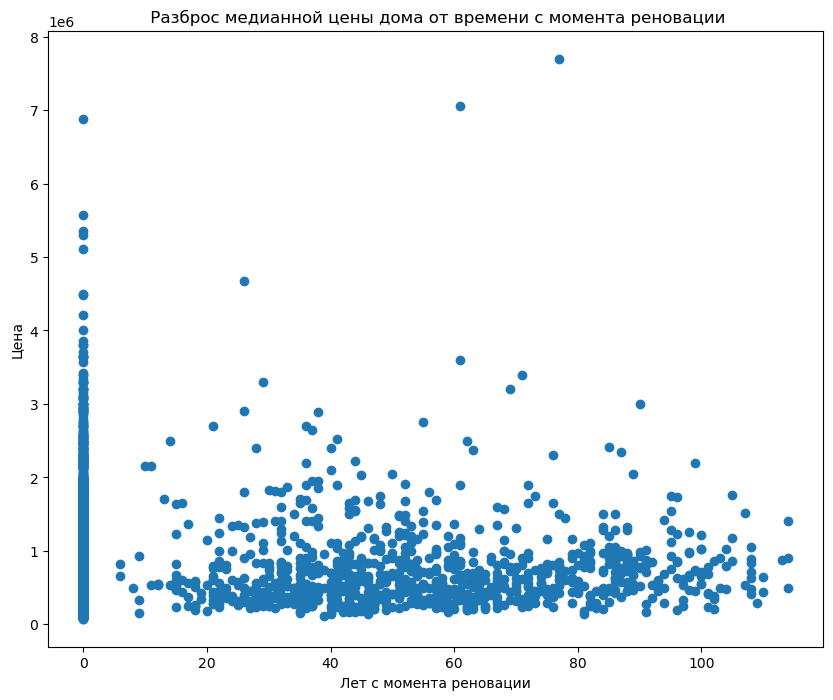

In [139]:
plt.figure(figsize=(10, 8))
plt.scatter(df['delta_renovated'], df['price'])

plt.title(' Разброс медианной цены дома от времени с момента реновации')
plt.xlabel('Лет с момента реновации')
plt.ylabel('Цена');


Здесь я проверил гипотезу, что медианная цена дома будет зависеть от времени, прошедшего с момента реновации. Гипотеза опровергается, значимой связи на диаграмме рассеивания не видно.

In [145]:
price_grade = df.groupby('grade').agg({'price' : 'median'}).round(2).reset_index().sort_values(by='grade')

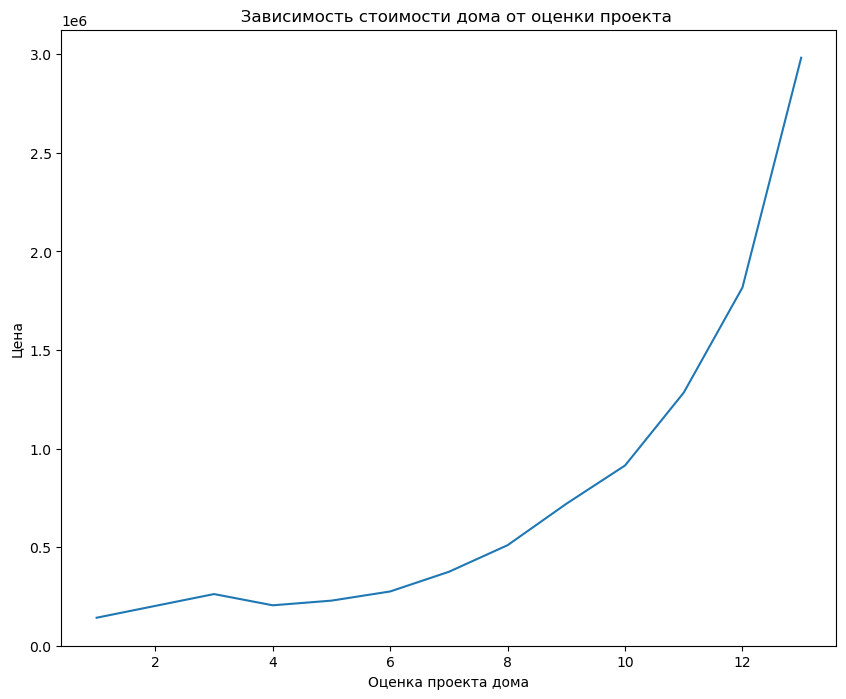

In [148]:
plt.figure(figsize=(10, 8))
plt.plot(price_grade['grade'], price_grade['price'])

plt.title('   Зависимость стоимости дома от оценки проекта')
plt.xlabel('Оценка проекта дома')
plt.ylabel('Цена');

Очень наглядный график. Мы видим практически идеальную квадратичную зависимость между медианной ценой дома и оценкой его проекта. Это логично, так как рост затрат на приобретение большего функционала растет с каждой новой добавленной функцией. Медианная цена "идеального" дома почти на порядок выше медианной цены дома, спроектированного на среднем уровне.

In [180]:
data1 = df['price'][df['view'] == 0]
data2 = df['price'][df['view'] == 1]
data3 = df['price'][df['view'] == 2]
data4 = df['price'][df['view'] == 3]
data5 = df['price'][df['view'] == 4]

Text(0, 0.5, 'Цена')

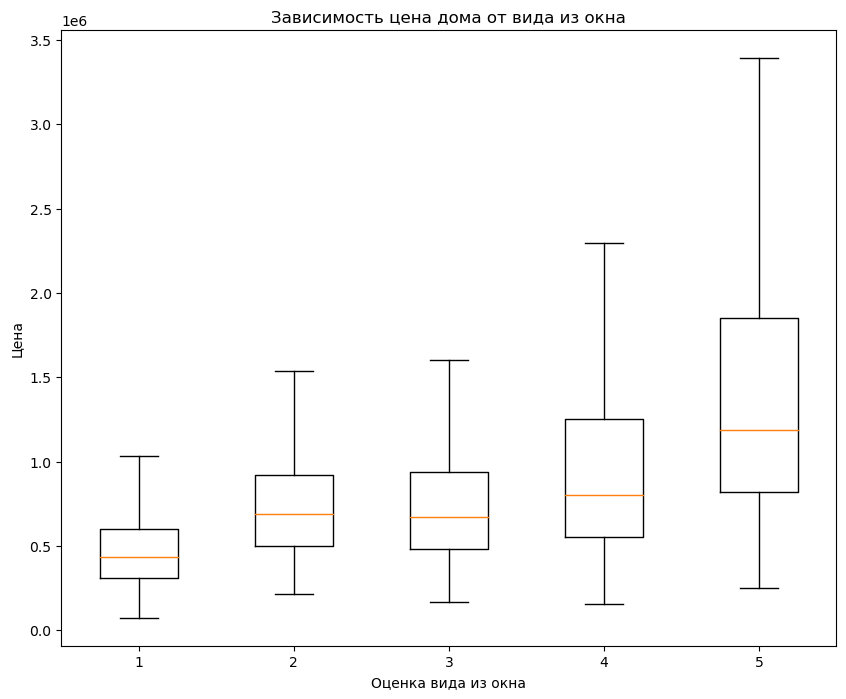

In [183]:
plt.figure(figsize=(10, 8))

plt.boxplot([data1, data2, data3, data4, data5], showfliers=False)
plt.title('Зависимость цена дома от вида из окна')
plt.xlabel('Оценка вида из окна')
plt.ylabel('Цена')

В целом ожидаемые результаты. Чем лучше вид из окна, тем недвижимость более ценная. Причем дома с максимальной оценкой имеют максимальный выброс в сторону более высокой цены. Также глядя на график можно утверждать, что за средний вид из окна премии обычно нет.